In [1]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.path import Path
import matplotlib.patches as patches
import time
from graphsearch import graphsearch
from utils import visualize_path

Size of the map: (1000, 1000)
Occupied Cells: 823039
Free Cells: 176961


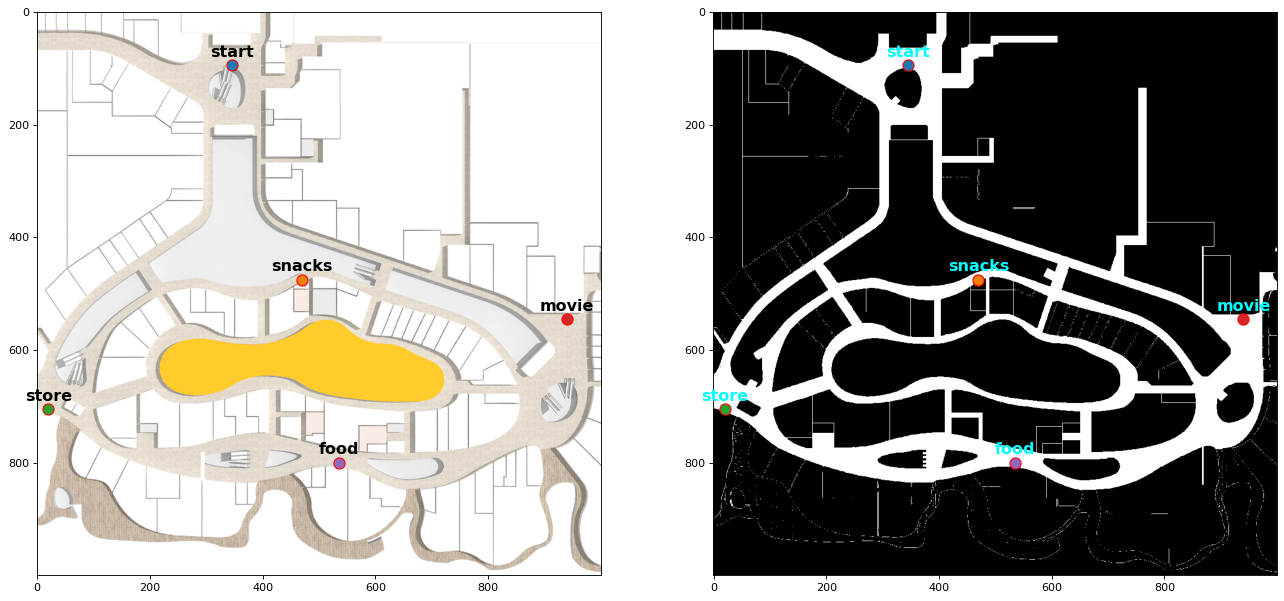

In [2]:
# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map = imageio.imread('./map/vivocity_freespace.png')
print("Size of the map:", grid_map.shape)
print("Occupied Cells:", np.count_nonzero(grid_map == 0))
print("Free Cells:", np.count_nonzero(grid_map == 255))

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start': [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],  # Garrett Popcorn
             'store': [20, 705],    # DJI Store
             'movie': [940, 545],   # Golden Village
             'food': [535, 800],    # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# Plot the locaitons on the map 
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
plt.subplot(1,2,2)
plt.imshow(grid_map, cmap='gray')
plot_locations(locations, color='cyan')
plt.show()

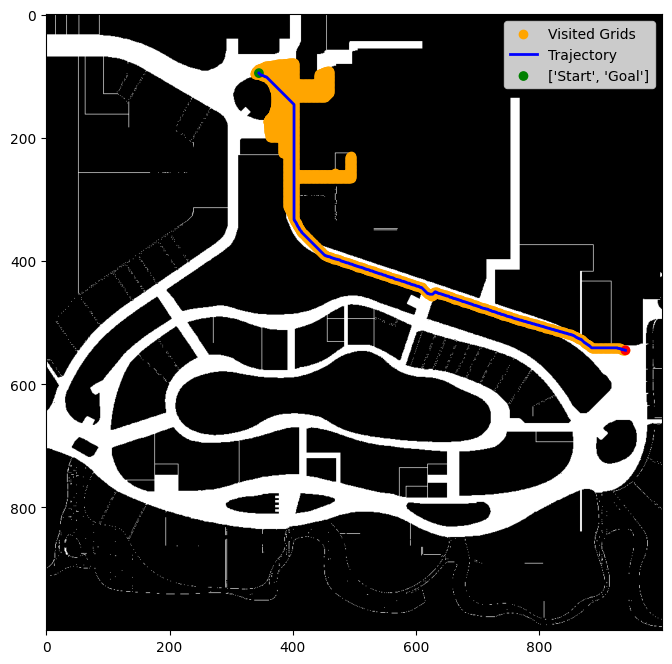

In [3]:
# Graph Search

# Select the Start and Goal nodes from list of locations provided. (Arbitrary goal and start nodes can be provided as well)
start_node = locations['start']
goal_node = locations['movie']

# Get the generated trajectory, number of cells visited during the graph search and the distance travelled
traj, visited_grids, distance = graphsearch(grid_map, resolution=MAP_RES,
                                            start=start_node, goal=goal_node, Astar=True)

# Plot the trajectory and the total number of grids visited
visualize_path(grid_map, visited_grids, traj, start_node, goal_node, delay=0.1)